<a href="https://colab.research.google.com/github/Sagar253443/digit_classification/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the simple implementation of neural networks for digits classification from 0 to 9 using mnist dataset(built in dataset of keras)**





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow import keras
from PIL import Image
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading the MNIST dataset from keras

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Checking the shape of data
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


#### The numpy array obtained for the training image represents a 28 x 28 matrices which contain an unique value of each pixels of the image dimension ,this value usually ranges fromm 0-255.
#### The image we considered in the dataset are greyscale images.

In [ ]:
#the image data is already converted into numpy arrays and the same of one image can be viewed
print(X_train[2005])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 141 255 254 124
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11 247 253 253 230
    9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 197 253 253 253 253
  138   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  88 253 253 253 253 250
  121   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  69 241 253 253 253 253 148
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  42 235 253 253 253 25

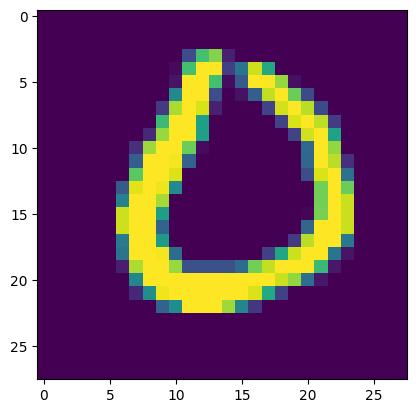

0


In [ ]:
#Plotting the image of previous train data and its corresponding training label

plt.imshow(X_train[2500])
plt.show()

print(Y_train[2500])

In [ ]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


Only select one model at a time and make all other as comments and run to check how the accuracy of a model depends on different activation functions.

In [ ]:
#Building the neural network

# model=keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(50,activation='relu'),
#     keras.layers.Dense(50,activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

# model=keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(50,activation='relu'),
#     keras.layers.Dense(50,activation='sigmoid'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

# model=keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(75,activation='sigmoid'),
#     keras.layers.Dense(75,activation='relu'),
#     keras.layers.Dense(10,activation='sigmoid')
# ])

In [ ]:
#compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the network

model.fit(X_train,Y_train,epochs=15)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8840 - accuracy: 0.7514
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.8511
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4305 - accuracy: 0.8654
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3941 - accuracy: 0.8780
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3669 - accuracy: 0.8872
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3443 - accuracy: 0.8948
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.9012
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3278 - accuracy: 0.8989
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.8981
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.297

In [ ]:
#Training accuracy is 97.75 lets compute the Testing accuracy as well

loss,accuracy=model.evaluate(X_test,Y_test)
print("Accuracy of Testing is ",accuracy*100,"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.9182
Accuracy of Testing is  91.82000160217285 %


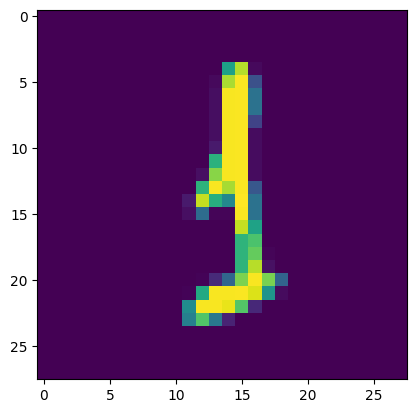

1


In [ ]:
#lets consider one data point of Test dataset

plt.imshow(X_test[900])
plt.show()

print(Y_test[900])


In [ ]:
Y_pred=model.predict(X_test)
print(Y_pred[900])

313/313 [==============================] - 1s 1ms/step
[0.00207068 0.84718573 0.0024153  0.9214807  0.02011624 0.9304627
 0.01318276 0.005687   0.14376375 0.13946955]


In [ ]:
#The above are the values generated at the output layer of our model of the test sample X_test[900]
#The output preducted is the label whose corresponding value in Y_pred array is max

Pred_label=np.argmax(Y_pred[900])
print("The digit is ",Pred_label)

The digit is  5


In [ ]:
#printing the y_pred values for all test data w.r.t to o/p layer

print(Y_pred)

[[5.5010606e-02 1.3969378e-02 7.1421438e-01 ... 9.9968797e-01
  1.1764969e-01 4.3079519e-01]
 [1.3440448e-01 4.7323611e-01 9.9540055e-01 ... 1.1544131e-01
  1.6117969e-01 1.3507124e-03]
 [4.1679613e-04 9.9753034e-01 5.7804006e-01 ... 1.1864350e-01
  5.8054113e-01 8.1873871e-03]
 ...
 [3.4510610e-03 1.6495328e-02 8.5695377e-03 ... 1.4504385e-01
  5.9165281e-01 9.6005356e-01]
 [1.0840821e-01 3.3266105e-02 8.0319643e-03 ... 5.2621225e-03
  6.6997874e-01 2.0329442e-02]
 [4.1927606e-01 6.0828999e-03 6.7905253e-01 ... 2.7229567e-03
  9.9938758e-02 8.2430542e-03]]


In [ ]:
#Converting all values of Y_pred to the corresponding class label(0-9)

Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 4, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 3, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 2, 2, 0, 8, 5, 7, 7, 8, 1, 8, 1, 8, 0, 3, 0, 1, 9, 8, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# Y_test--> True labels and Y_pred_label--> predicted label
# Confusion matrix

c_mat=confusion_matrix(Y_test,Y_pred_label)
print(c_mat)

tf.Tensor(
[[ 946    0    2    1    1   18    6    3    2    1]
 [   0 1110    9    2    1    5    2    0    6    0]
 [  13    1  962   11   13    1    5   12   13    1]
 [   3    1   24  904    1   38    0   19   12    8]
 [   2    0    3    1  906    5    9    3    5   48]
 [  11    1    3   20    3  801    9    5   33    6]
 [  17    2    4    1    8   16  899    0   11    0]
 [   3   11   15    5    9    0    0  953    3   29]
 [   9   11   15   30   12   43    9   13  823    9]
 [   7    5    2   13   58   10    1   21   14  878]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

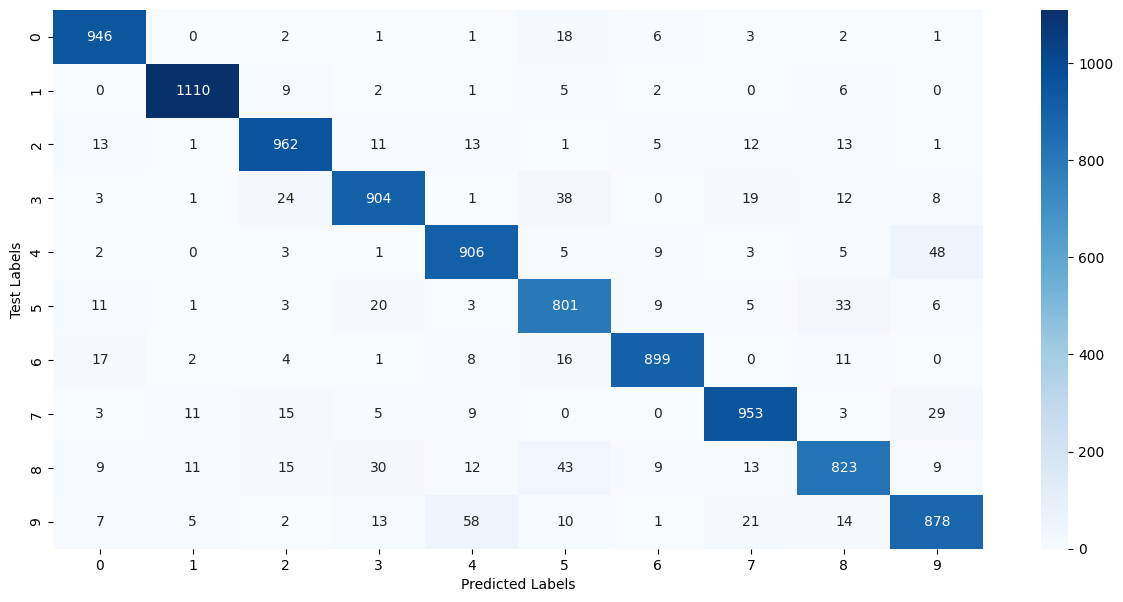

In [ ]:
#To understand in better way we can construct the heatmap using the seaborn &matplotlib packages

plt.figure(figsize=(15,7))
sbn.heatmap(c_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel("Test Labels")
plt.xlabel("Predicted Labels")

In this heat map we can say that how correcting our model is predicting the outputs for the test data.
Considering an example in above plot in row-6,column-4 we could see some value,which says that our model wrongly predicts the label as 3 for 465 test samples instead of prdicting it with label 5.

### Building the predictive model for prediction of label for new data

Path of the image to be predicted: /content/img1_0.png


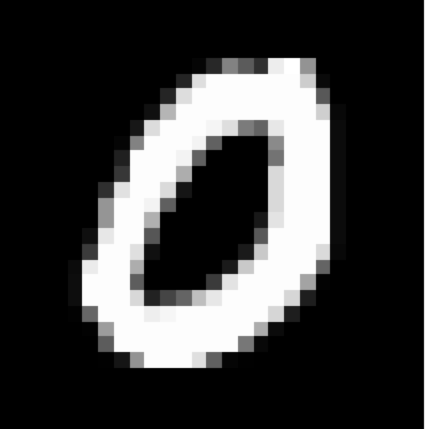

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  0


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)